In [7]:
!pip install python_louvain

In [8]:
!pip install --upgrade scipy networkx python-louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.2 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2
    Uninstalling networkx-3.2:
      Successfully uninstalled networkx-3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [9]:
!pip install 'networkx<2.7'

!pip install 'scipy>=1.8'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [10]:
def shorten_url(url):
    if isinstance(url, str) and "/" in url:
        return '/' + url.split('/')[-1]
    return url

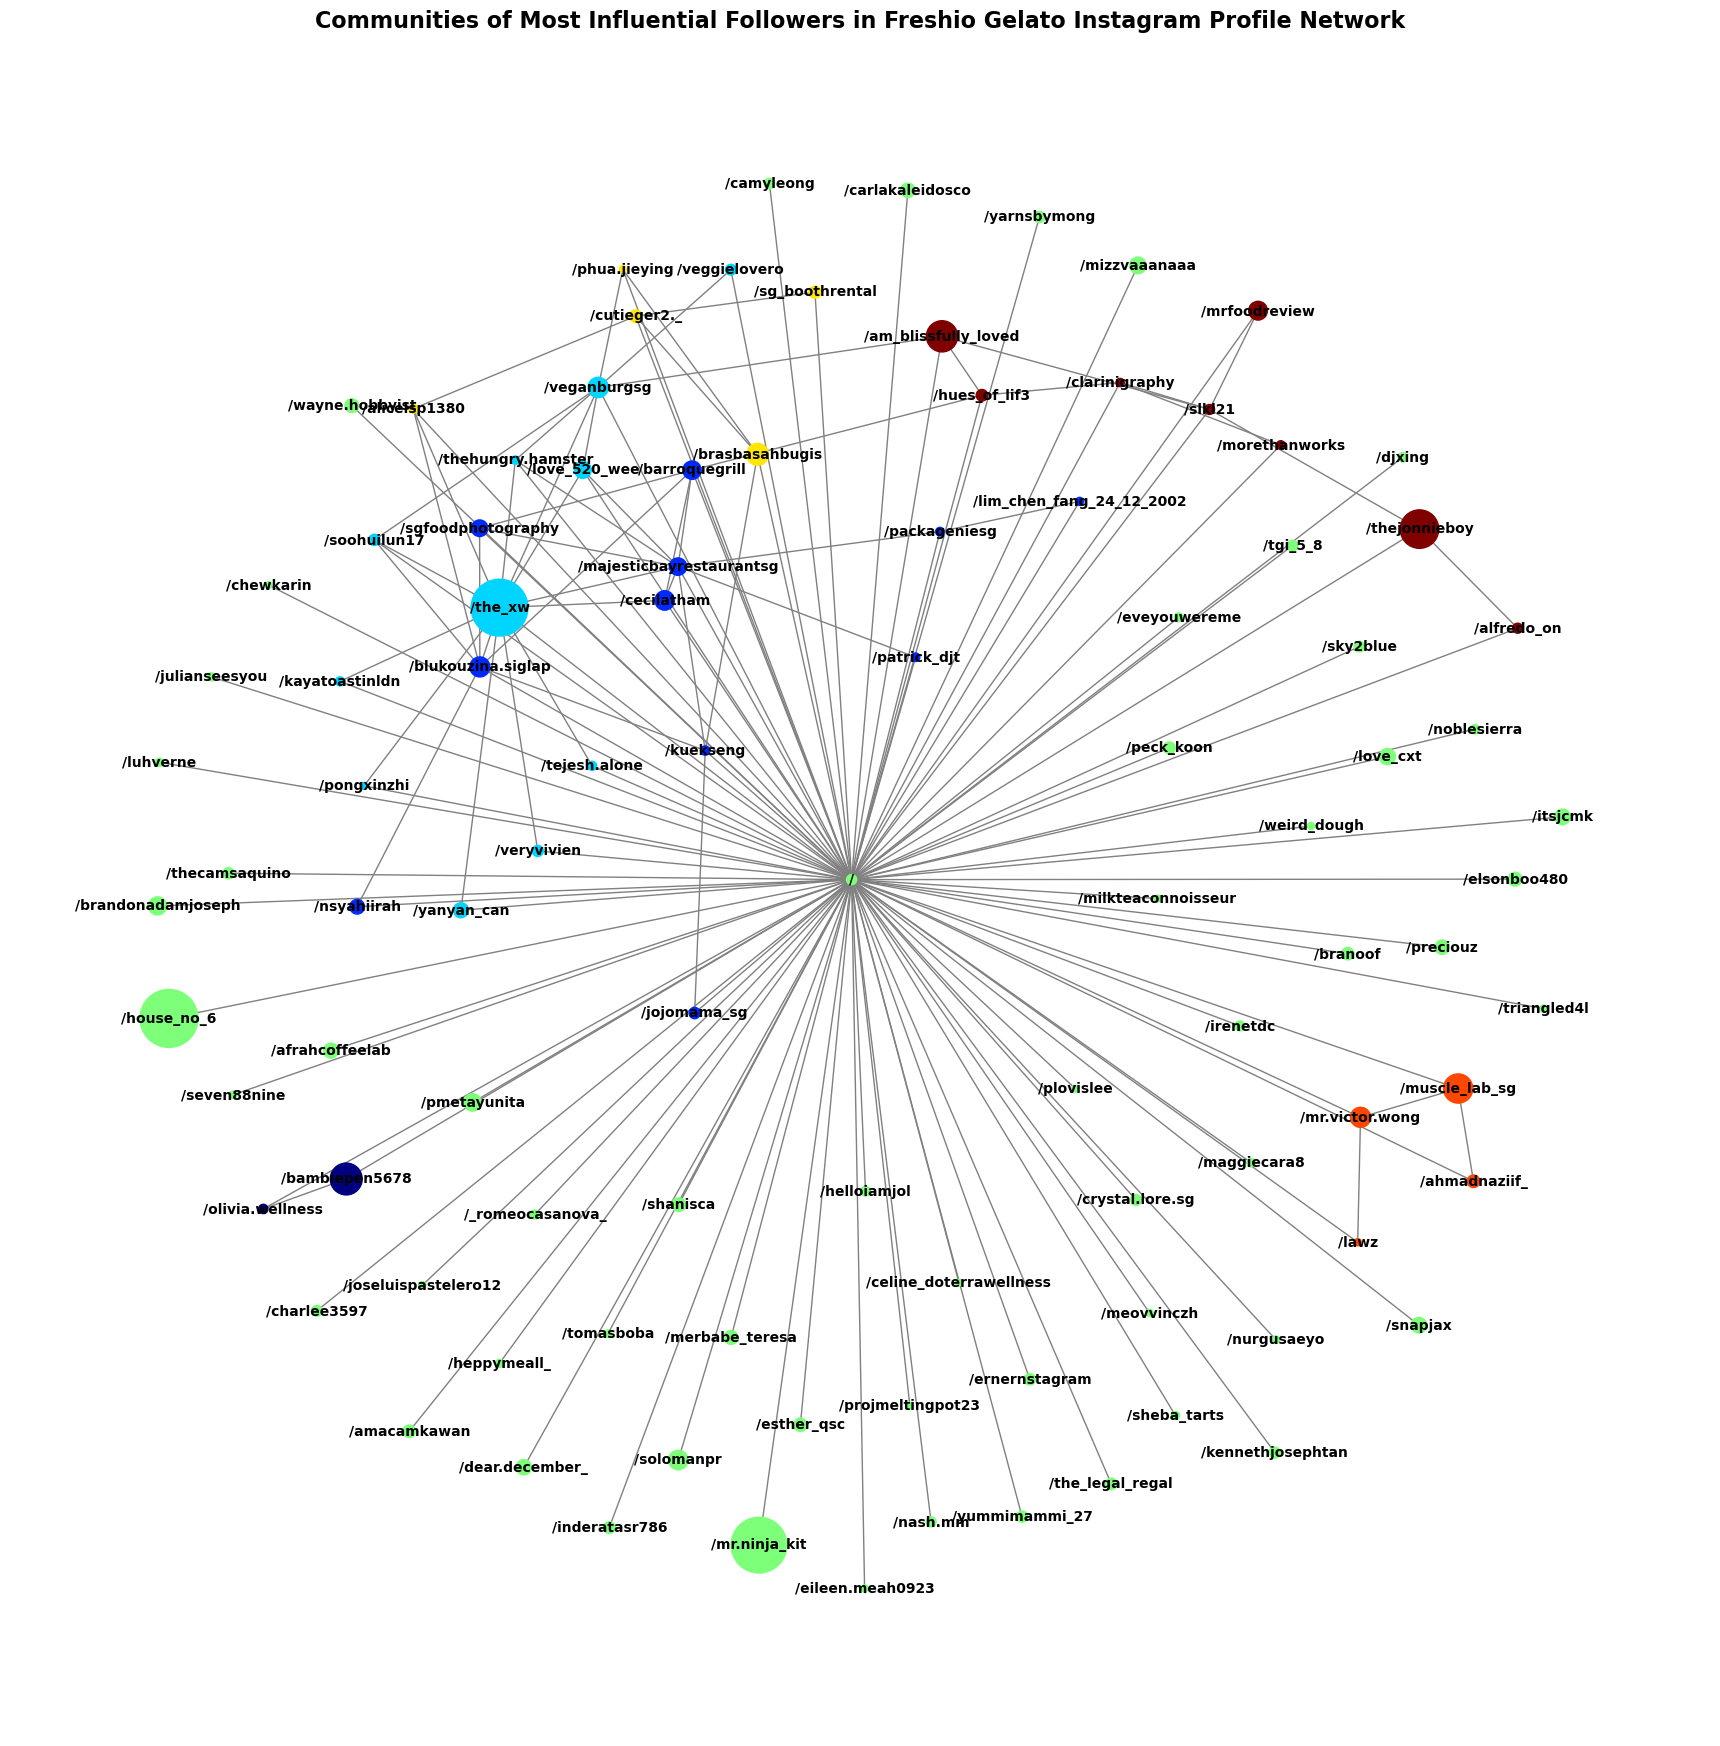

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Load the graph data from the saved JSON file
with open('merged3.json', 'r') as json_file:
    graph_data = json.load(json_file)

# Create a new graph
G_loaded = nx.Graph()

# Add nodes and edges from the loaded data
for node in graph_data['nodes']:
    G_loaded.add_node(node['id'])

for edge in graph_data['edges']:
    G_loaded.add_edge(edge['source'], edge['target'])

# Compute PageRank centrality for each node
pagerank_centrality = nx.pagerank(G_loaded)

# Get the most influential nodes based on PageRank scores
most_influential_nodes = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:100]
most_influential_node_names = [node[0] for node in most_influential_nodes]

# Create a subgraph with the most influential nodes and their neighbors
subgraph = G_loaded.subgraph(most_influential_node_names)

# Community detection using Louvain's method
partition = community_louvain.best_partition(subgraph)
community_colors = [partition[node] for node in subgraph.nodes()]

# Shorten the labels
shortened_labels = {node: shorten_url(node) for node in subgraph.nodes()}

# Visualize the subgraph with communities
pos = nx.spring_layout(subgraph, k=0.025)
plt.figure(figsize=(17, 17))
nx.draw(
    subgraph,
    pos,
    labels=shortened_labels,
    cmap=plt.get_cmap('jet'),
    node_color=community_colors,  # Use colors based on communities
    node_size=[pagerank_centrality[node] * 35000 for node in subgraph.nodes()],
    font_size=10,
    font_weight="bold",
    edge_color="gray",
    width=1,
    alpha=1,
)
plt.title("Communities of Most Influential Followers in Freshio Gelato Instagram Profile Network", fontsize=16, fontweight='bold')
plt.show()


In [3]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

In [ ]:
print(most_influential_nodes[3])

('https://www.instagram.com/thejonnieboy', 0.021926401023031564)


In [4]:
df = pd.read_csv('Pagerank_Top_100.csv')
df

,profileUrl,profileName,fullName,followersCount,followingCount,isBusinessAccount,joinedRecently,Type,Category,Rank_Count,Rank,isVerified,postsCount,website,publicEmail,businessCategory,businessZipCode
0,https://instagram.com/house_no_6/,house_no_6,House No. 6,19539,709,False,False,Personal blog,House,99,1,False,104.0,https://linktr.ee/houseno6,NaN,NaN,NaN
1,https://instagram.com/the_xw/,the_xw,XW,20003,6363,False,False,Photographer,Food,98,2,False,5866.0,http://jiaksimipng.wordpress.com/,jiaksimipng@outlook.com,NaN,NaN
2,https://instagram.com/mr.ninja_kit/,mr.ninja_kit,⚔️猫忍者⚔️,17887,1660,True,False,Creators & Celebrities,Pet,97,3,False,722.0,https://linktr.ee/mr.ninja,NaN,Creators & Celebrities,NaN
3,https://instagram.com/thejonnieboy/,thejonnieboy,⠀⠀⠀⠀⠀⠀⠀⠀⠀ｔｈｅｊｏｎｎｉｅｂｏｙ,9177,3899,True,False,Creators & Celebrities,Lifestyle,96,4,False,37.0,NaN,NaN,Business & Utility Services,NaN
4,https://instagram.com/bambiepen5678/,bambiepen5678,Penny | L&D | Entrepreneur | Wellness Enthusia...,6051,3418,False,False,Creators & Celebrities,Lifestyle,95,5,False,3230.0,https://tenniscoachinghealth.usana.com/,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,https://instagram.com/milkteaconnoisseur/,milkteaconnoisseur,Milk Tea Connoisseur,359,101,True,False,Personal blog,Food,5,95,False,181.0,NaN,onedaypundit@gmail.com,Creators & Celebrities,NaN
95,https://instagram.com/pongxinzhi/,pongxinzhi,xinzhi,296,362,False,False,Photographer,Lifestyle,4,96,False,169.0,NaN,NaN,NaN,NaN
96,https://instagram.com/phua.jieying/,phua.jieying,Jie-Ying 🇸🇬,338,3220,False,False,Personal blog,Lifestyle,3,97,False,319.0,https://linktr.ee/phua.jieying,NaN,NaN,NaN
97,https://instagram.com/chewkarin/,chewkarin,Chew Karin,306,743,True,False,Personal blog,Property,2,98,False,422.0,http://www.mayh.tumblr.com/,NaN,Professional Services,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   profileUrl         99 non-null     object 
 1   profileName        99 non-null     object 
 2   fullName           94 non-null     object 
 3   followersCount     99 non-null     int64  
 4   followingCount     99 non-null     int64  
 5   isBusinessAccount  99 non-null     bool   
 6   joinedRecently     99 non-null     bool   
 7   Type               99 non-null     object 
 8   Category           99 non-null     object 
 9   Rank_Count         99 non-null     int64  
 10  Rank               99 non-null     int64  
 11  isVerified         99 non-null     bool   
 12  postsCount         98 non-null     float64
 13  website            41 non-null     object 
 14  publicEmail        14 non-null     object 
 15  businessCategory   26 non-null     object 
 16  businessZipCode    6 non-nul

In [6]:
import json
import networkx as nx
import community as community_louvain
import pandas as pd


G_loaded = nx.Graph()

for node in graph_data['nodes']:
    G_loaded.add_node(node['id'])

for edge in graph_data['edges']:
    G_loaded.add_edge(edge['source'], edge['target'])

# Compute PageRank centrality for each node
pagerank_centrality = nx.pagerank(G_loaded)

# Get the most influential nodes based on PageRank scores
most_influential_nodes = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:1000]
most_influential_node_names = [node[0] for node in most_influential_nodes]

# Create a subgraph with the most influential nodes and their neighbors
subgraph = G_loaded.subgraph(most_influential_node_names)

# Community detection using Louvain's method
partition = community_louvain.best_partition(subgraph)

# Create a dataframe with just the URLs and their corresponding community labels
df_community = pd.DataFrame({
    'profileUrl': most_influential_node_names,
    'community_label': [partition[node] for node in most_influential_node_names]
})

# Print or save the dataframe
print(df_community)

NameError: ignored

In [ ]:
merged_df["community_label"] = df_community["community_label"]
merged_df.head()

,profileUrl,profileName,fullName,followersCount,followingCount,isBusinessAccount,joinedRecently,Type,Category,Rank_Count,Rank,isVerified,postsCount,website,publicEmail,businessCategory,businessZipCode,community_label
0,https://instagram.com/house_no_6/,house_no_6,House No. 6,19539,709,False,False,Personal blog,House,99,1,False,104.0,https://linktr.ee/houseno6,NaN,NaN,NaN,5
1,https://instagram.com/the_xw/,the_xw,XW,20003,6363,False,False,Photographer,Food,98,2,False,5866.0,http://jiaksimipng.wordpress.com/,jiaksimipng@outlook.com,NaN,NaN,1
2,https://instagram.com/mr.ninja_kit/,mr.ninja_kit,⚔️猫忍者⚔️,17887,1660,True,False,Creators & Celebrities,Pet,97,3,False,722.0,https://linktr.ee/mr.ninja,NaN,Creators & Celebrities,NaN,6
3,https://instagram.com/thejonnieboy/,thejonnieboy,⠀⠀⠀⠀⠀⠀⠀⠀⠀ｔｈｅｊｏｎｎｉｅｂｏｙ,9177,3899,True,False,Creators & Celebrities,Lifestyle,96,4,False,37.0,NaN,NaN,Business & Utility Services,NaN,11
4,https://instagram.com/bambiepen5678/,bambiepen5678,Penny | L&D | Entrepreneur | Wellness Enthusia...,6051,3418,False,False,Creators & Celebrities,Lifestyle,95,5,False,3230.0,https://tenniscoachinghealth.usana.com/,NaN,NaN,NaN,10


In [ ]:
grouped_df = merged_df.groupby(['community_label', 'Category']).size().reset_index(name='count')

In [ ]:
!pip install seaborn

     -------------------------------------- 294.6/294.6 kB 2.6 MB/s eta 0:00:00


## Inference
1. Community 1,2, 11: Concregation of lifestyle blogger, micro influencers type.
2. Community 5: Restaurants like: Mediteranean, Seafood, Vegetarian, and western are connect with 1 food blogger


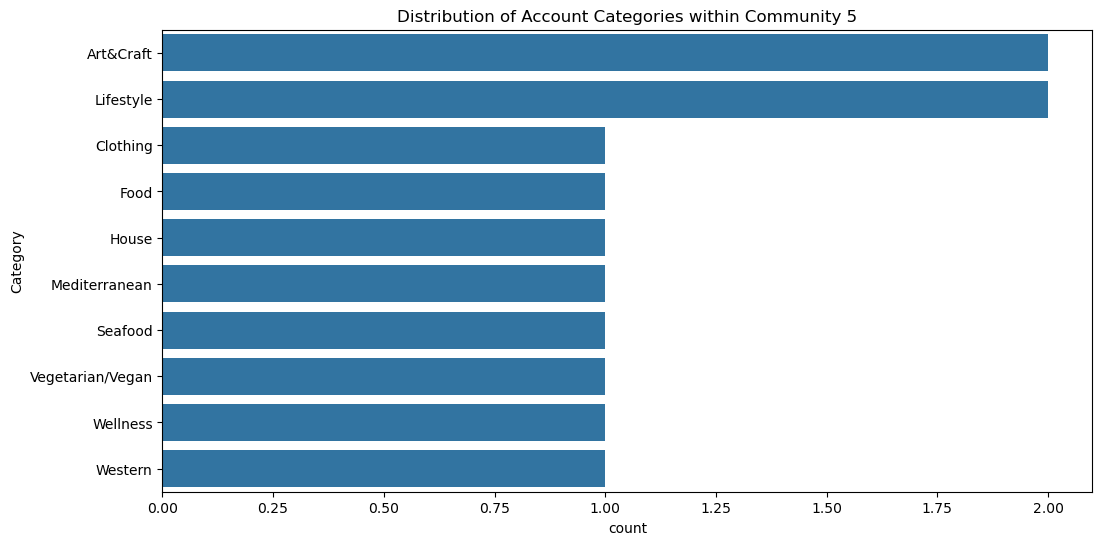

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for community label 1
community_df = grouped_df[grouped_df['community_label'] == 5]

plt.figure(figsize=(12, 6))
sns.barplot(y='Category', x='count', data=community_df, order=community_df.sort_values('count', ascending=False)['Category'])
plt.title('Distribution of Account Categories within Community 5')
plt.show()


In [ ]:
merged_df[merged_df["community_label"] == 2]

,profileUrl,profileName,fullName,followersCount,followingCount,isBusinessAccount,joinedRecently,Type,Category,Rank_Count,Rank,isVerified,postsCount,website,publicEmail,businessCategory,businessZipCode,community_label
5,https://instagram.com/am_blissfully_loved/,am_blissfully_loved,🇸🇬 ʏᴜᴋɪ • ʟɪꜰᴇꜱᴛʏʟᴇ • ᴘᴀʀᴇɴᴛɪɴɢ • ʙᴇᴀᴜᴛʏ • ꜰᴏᴏᴅ,6451,7030,False,False,Personal blog,Lifestyle,94,6,False,1276.0,https://linktr.ee/Am_blissfully_loved,NaN,NaN,NaN,2
28,https://instagram.com/preciouz/,preciouz,preciouz,1745,7415,False,False,Personal blog,Food,71,29,False,179.0,NaN,NaN,NaN,NaN,2
34,https://instagram.com/esther_qsc/,esther_qsc,E S T H E R,1066,588,False,False,Personal blog,Lifestyle,65,35,False,56.0,NaN,NaN,NaN,NaN,2
42,https://instagram.com/hues_of_lif3/,hues_of_lif3,zy,1152,6157,False,False,Personal blog,Lifestyle,57,43,False,1165.0,NaN,NaN,NaN,NaN,2
61,https://instagram.com/irenetdc/,irenetdc,Irene Lim ❤️,1189,1013,False,False,Personal blog,Dance,38,62,False,150.0,NaN,NaN,NaN,NaN,2
76,https://instagram.com/thehungry.hamster/,thehungry.hamster,Hungry Hamster 🐹🧀,580,4292,False,False,Personal blog,Food,23,77,False,16.0,http://tiktok.com/@thehungry.hamster,NaN,NaN,NaN,2
79,https://instagram.com/julianseesyou/,julianseesyou,Julian Shi,395,599,False,False,Personal blog,Lifestyle,20,80,False,30.0,NaN,NaN,NaN,NaN,2
91,https://instagram.com/eileen.meah0923/,eileen.meah0923,Eileen Meah,302,897,False,False,Personal blog,Food,8,92,False,17.0,NaN,NaN,NaN,NaN,2
